In [240]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB, BernoulliNB 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests


# Combining the data

In [241]:
tweets = pd.read_pickle('tweets_processed.pkl')
stocks = pd.read_pickle('stocks_processed.pkl')

In [242]:
stocks.index.rename(tweets.index.name, inplace=True)

In [243]:
df = pd.merge(tweets, stocks, on=[tweets.index.name])

In [244]:
df

retweets     favorites       replies  \
date                                                                  
2012-01-03 00:00:00-05:00     93.000000     21.000000      3.000000   
2012-01-04 00:00:00-05:00      6.000000     11.000000      4.000000   
2012-01-06 00:00:00-05:00     38.666667     12.333333     12.666667   
2012-01-11 00:00:00-05:00     68.000000    325.000000     28.000000   
2012-01-12 00:00:00-05:00    110.000000     30.000000     14.000000   
...                                 ...           ...           ...   
2020-04-27 00:00:00-05:00   1398.909091  11629.545455    427.409091   
2020-04-28 00:00:00-05:00   2610.000000  26219.833333    785.833333   
2020-04-29 00:00:00-05:00  16334.333333  96908.500000  10535.500000   
2020-04-30 00:00:00-05:00   5230.210526  26869.578947   1823.631579   
2020-05-01 00:00:00-05:00   6540.500000  61799.750000   4882.850000   

                           reply_count  closely_related  url_news  url_video  \
date                                                                           
2012-01-03 00:00:00-05:00     0.000000         0.000000  0.000000        0.0   
2012-01-04 00:00:00-05:00     0.500000         0.000000  0.000000        0.0   
2012-01-06 00:00:00-05:00     0.000000         0.666667  0.000000        0.0   
2012-01-11 00:00:00-05:00     0.000000         0.000000  0.000000        0.0   
2012-01-12 00:00:00-05:00     0.000000         1.000000  0.000000        0.0   
...                                ...              ...       ...        ...   
2020-04-27 00:00:00-05:00     0.818182         0.045455  0.045455        0.0   
2020-04-28 00:00:00-05:00     0.666667         0.000000  0.000000        0.0   
2020-04-29 00:00:00-05:00     0.500000         0.000000  0.166667        0.0   
2020-04-30 00:00:00-05:00     0.736842         0.000000  0.000000        0.0   
2020-05-01 00:00:00-05:00     0.500000         0.050000  0.000000        0.0   

                           money_related  other_related  tesla  polarity  \
date                                                                       
2012-01-03 00:00:00-05:00            0.0     114.000000   0.00  0.300000   
2012-01-04 00:00:00-05:00            0.0     131.000000   0.00  0.495000   
2012-01-06 00:00:00-05:00            0.0      93.000000   0.00  0.134722   
2012-01-11 00:00:00-05:00            0.0     117.000000   1.00  0.350000   
2012-01-12 00:00:00-05:00            0.0     125.000000   0.00  0.050000   
...                                  ...            ...    ...       ...   
2020-04-27 00:00:00-05:00            0.0      45.000000   0.00  0.165909   
2020-04-28 00:00:00-05:00            0.0      36.500000   0.00  0.198611   
2020-04-29 00:00:00-05:00            0.0      28.333333   0.00  0.162500   
2020-04-30 00:00:00-05:00            0.0      26.684211   0.00  0.073173   
2020-05-01 00:00:00-05:00            0.1      40.300000   0.05  0.118046   

                           subjectivity  time_of_day  day_of_week  \
date                                                                
2012-01-03 00:00:00-05:00      0.308333     1.000000            1   
2012-01-04 00:00:00-05:00      0.661944    16.000000            2   
2012-01-06 00:00:00-05:00      0.255556    13.000000            4   
2012-01-11 00:00:00-05:00      0.650000    21.000000            2   
2012-01-12 00:00:00-05:00      0.400000    21.000000            3   
...                                 ...          ...          ...   
2020-04-27 00:00:00-05:00      0.341742    14.136364            0   
2020-04-28 00:00:00-05:00      0.305556    17.833333            1   
2020-04-29 00:00:00-05:00      0.283333     4.333333            2   
2020-04-30 00:00:00-05:00      0.171984    14.842105            3   
2020-05-01 00:00:00-05:00      0.329831    11.050000            4   

                           (TSLA_close_%, )  (NASDAQ_close_%, )  \
date                                                              
2012-01-03 00:00:00-05:00               NaN  

### Rename column names

In [245]:
df.columns = [str(name) for name in tweets.columns] + [name[0] for name in df.columns[14:]]

In [246]:
df.dropna(inplace=True)
df.describe()

retweets      favorites       replies  reply_count  \
count    1192.000000    1192.000000   1192.000000  1192.000000   
mean     2118.500743   14349.690584    417.867497     0.567854   
std      6775.152029   37276.633883    979.030753     0.393984   
min         0.000000       1.000000      1.000000     0.000000   
25%       209.750000     654.125000     73.857143     0.000000   
50%       718.625000    3991.833333    189.000000     0.666667   
75%      1729.062500   14083.833333    442.166667     1.000000   
max    170455.500000  865451.000000  23664.500000     1.000000   

       closely_related     url_news    url_video  money_related  \
count      1192.000000  1192.000000  1192.000000    1192.000000   
mean          0.150807     0.023711     0.031063       0.006360   
std           0.355080     0.125596     0.137919       0.066858   
min           0.000000     0.000000     0.000000       0.000000   
25%           0.000000     0.000000     0.000000       0.000000   
50%           0.000000     0.000000     0.000000       0.000000   
75%           0.142857     0.000000     0.000000       0.000000   
max           5.000000     1.000000     1.000000       2.000000   

       other_related        tesla     polarity  subjectivity  time_of_day  \
count    1192.000000  1192.000000  1192.000000   1192.000000  1192.000000   
mean       76.884723     0.152217     0.134393      0.347186    12.861099   
std        38.081570     0.325580     0.195177      0.219241     5.263388   
min         2.000000     0.000000    -0.800000      0.000000     0.000000   
25%        48.000000     0.000000     0.000000      0.203877     9.911184   
50%        75.500000     0.000000     0.104710      0.333452    13.500000   
75%       102.500000     0.142857     0.215417      0.477273    16.723485   
max       262.000000     3.000000     1.000000      1.000000    23.000000   

       day_of_week  TSLA_close_%  NASDAQ_close_%  net_close_%     net_diff  \
count  1192.000000   1192.000000     1192.000000  1192.000000  1192.000000   
mean      2.020973      0.002560        0.000611     0.001949     0.000776   
std       1.394025      0.036312        0.012432     0.032686     0.050803   
min       0.000000     -0.193274       -0.123213    -0.188125    -0.564869   
25%       1.000000     -0.013532       -0.003840    -0.013036    -0.019626   
50%       2.000000      0.001221        0.000796     0.000452    -0.001441   
75%       3.000000      0.017629        0.006355     0.015729     0.017584   
max       4.000000      0.243951        0.081215     0.245152     0.385386   

           net_vol  
count  1192.000000  
mean     -0.001366  
std       0.108491  
min      -0.472466  
25%      -0.052382  
50%      -0.009502  
75%       0.041796  
max       0.806645

# Exploring the data

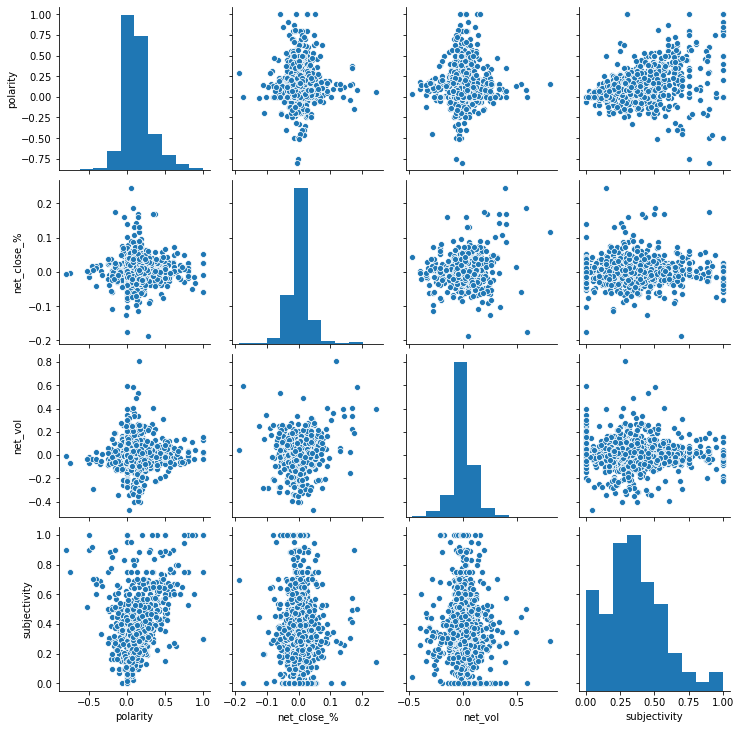

In [247]:
sns.pairplot(df[['polarity', 'net_close_%', 'net_vol', 'subjectivity']])

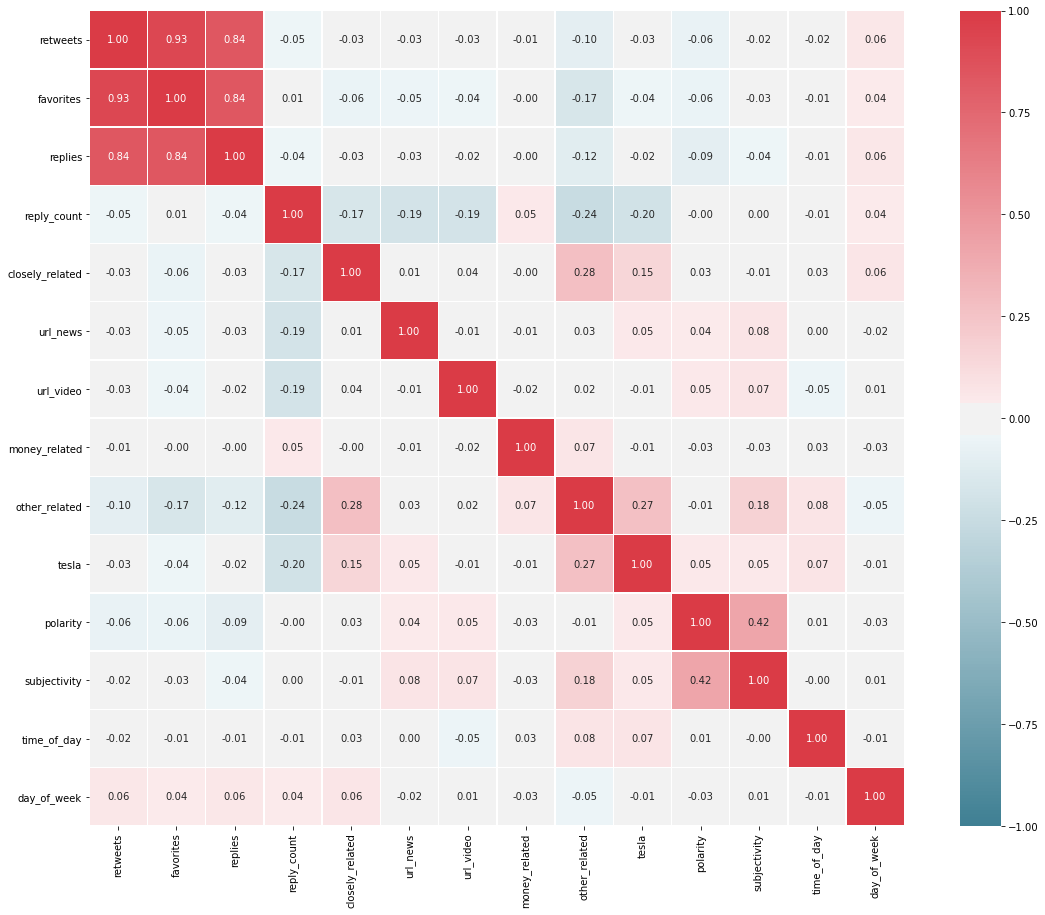

In [248]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.subplots(figsize=(20,15))
sns.heatmap(df.iloc[:,:14].corr(), cmap=cmap, vmax=1, center=0, vmin=-1,
            square=True, linewidths=.5,  annot=True, fmt=".2f")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FE1B0C18B0>,
      dtype=object)

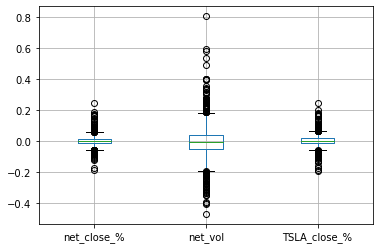

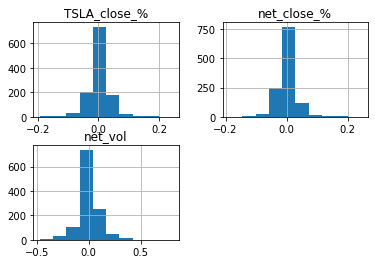

In [249]:
df[['net_close_%', 'net_vol', 'TSLA_close_%']].boxplot()
df[['net_close_%', 'net_vol', 'TSLA_close_%']].hist()

In [250]:
df['net_close_effect'] =df['net_close_%'].abs()
df['net_vol_effect']  =df['net_vol'].abs()
print(df['net_close_effect'].quantile([.25, .5, .75]))
print(df['net_vol_effect'].quantile([.25, .5, .75]))

0.25    0.006097
0.50    0.014531
0.75    0.026673
Name: net_close_effect, dtype: float64
0.25    0.020925
0.50    0.048464
0.75    0.090132
Name: net_vol_effect, dtype: float64


In [251]:
df['net_close_effect'] = df['net_close_effect'].apply(lambda x: 1 if x > 0.014 else 0)
df['net_vol_effect'] = df['net_vol_effect'].apply(lambda x: 1 if x > 0.048 else 0)
print(df['net_close_effect'].value_counts())
print(df['net_vol_effect'].value_counts())

1    607
0    585
Name: net_close_effect, dtype: int64
1    600
0    592
Name: net_vol_effect, dtype: int64


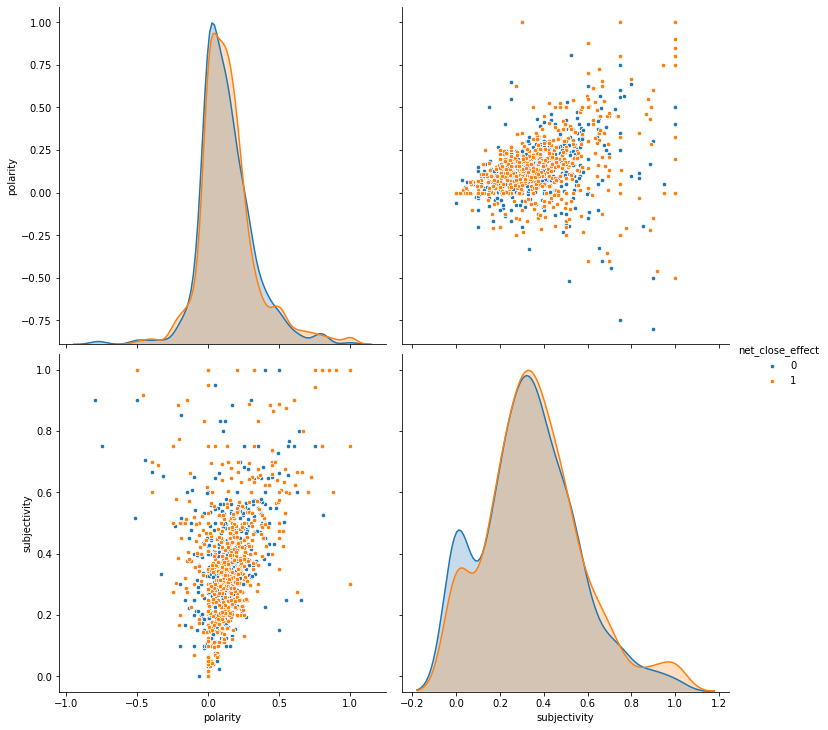

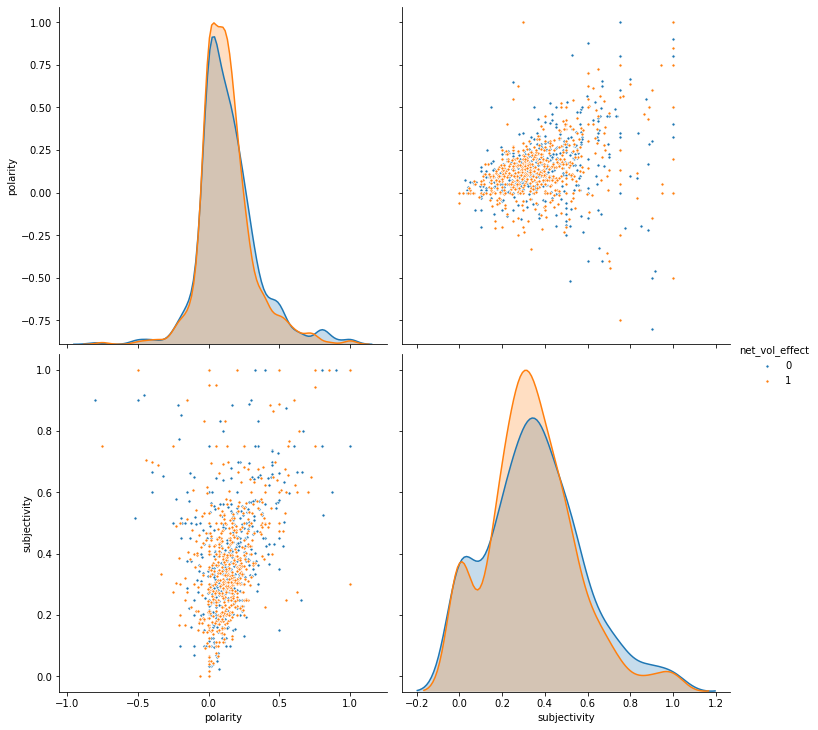

In [252]:
sns.pairplot(df[['polarity', 'subjectivity', 'net_close_effect']], hue='net_close_effect', size=5, plot_kws={"s": 20})
plt.show()
sns.pairplot(df[['polarity', 'subjectivity', 'net_vol_effect']], hue='net_vol_effect', size=5, plot_kws={"s": 10})

In [253]:
df['net_vol_effect'].abs().value_counts()

1    600
0    592
Name: net_vol_effect, dtype: int64

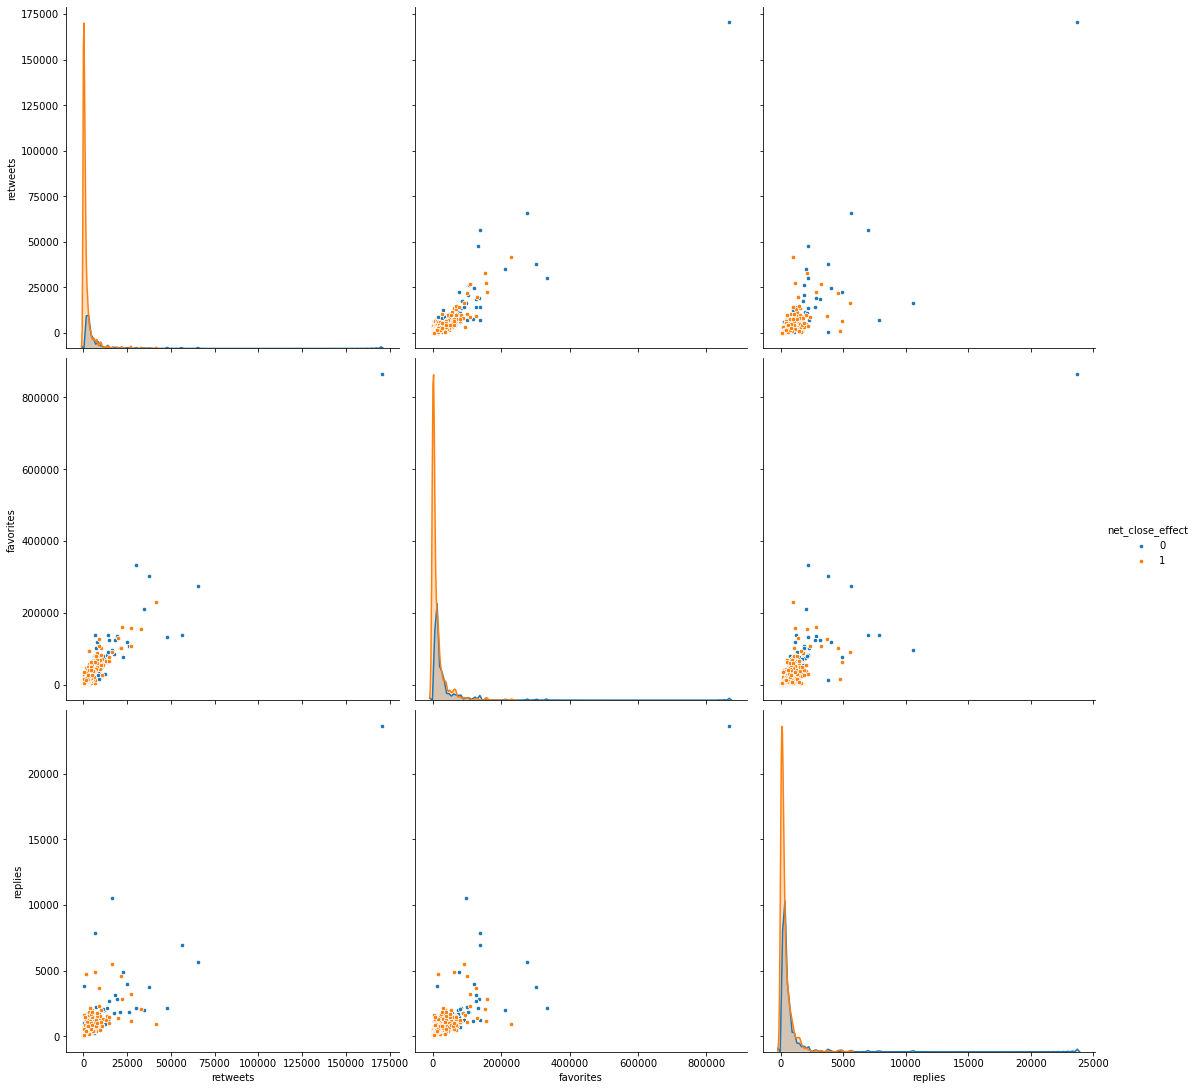

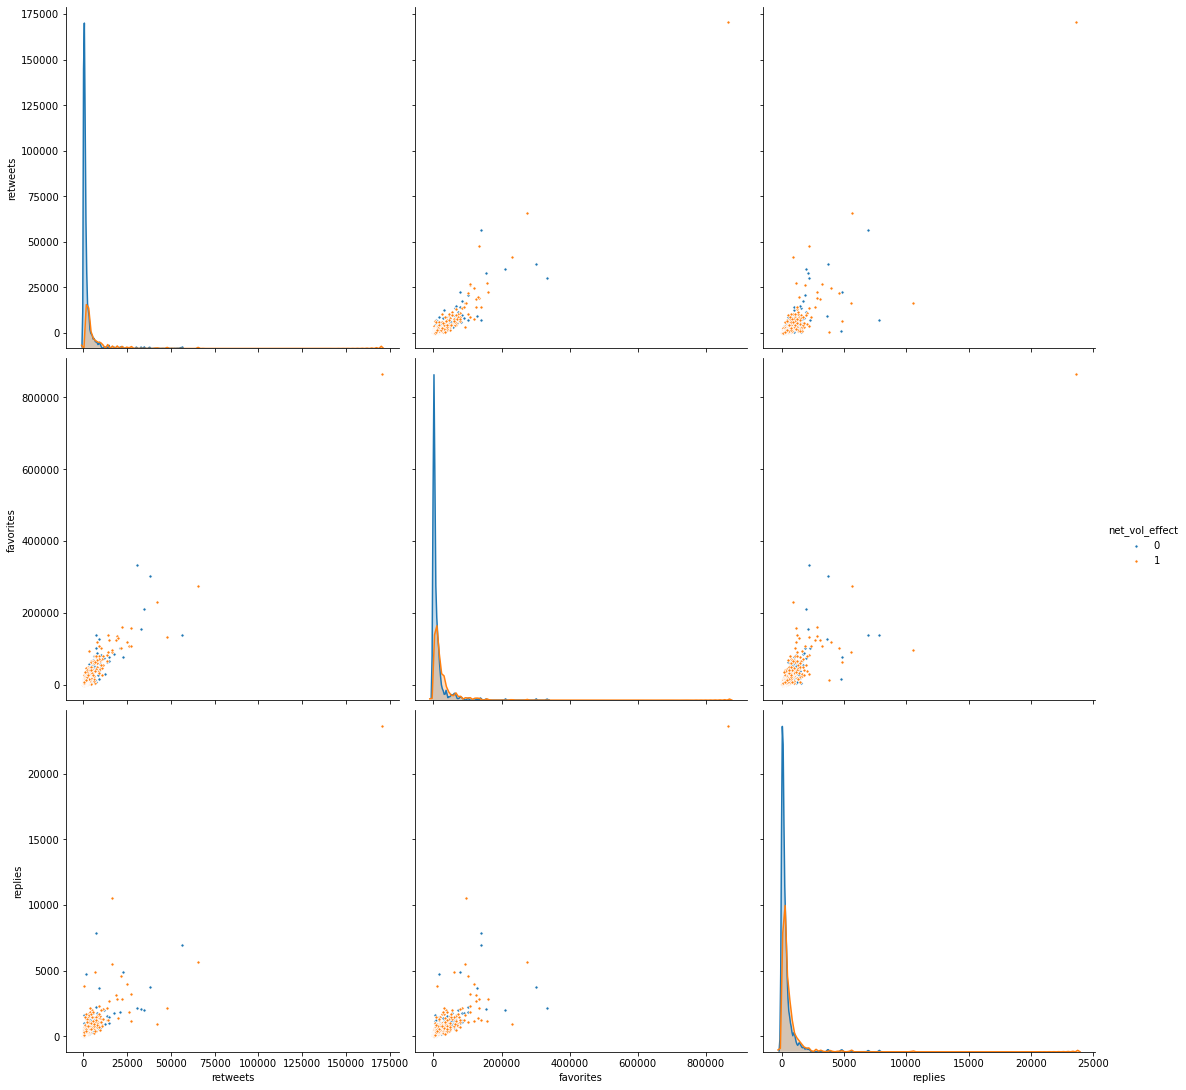

In [254]:
sns.pairplot(df[['retweets', 'favorites', 'replies', 'net_close_effect']], hue='net_close_effect', size=5, plot_kws={"s": 20})
plt.show()
sns.pairplot(df[['retweets', 'favorites', 'replies', 'net_vol_effect']], hue='net_vol_effect', size=5, plot_kws={"s": 10})

In [255]:
y_name = 'net_vol_effect'
X = df[['retweets',	'favorites', 'replies', 'closely_related',	'url_news',	'url_video',	'money_related','reply_count',	'other_related',	'tesla',	'polarity',	'subjectivity',	'day_of_week']]
y = df[y_name]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [256]:
def balance(y_name, X, y):
    df_train = pd.merge(X, y, on='date')
    count_class_0, count_class_1 = df_train[y_name].value_counts()
    df_class_0  = df_train[df_train[y_name] == 0]
    df_class_1 = df_train[df_train[y_name] == 1]
    df_class_1_over = df_class_1.sample(count_class_0, replace=True)
    df_train_over = pd.concat([df_class_0, df_class_1_over], axis=0)
    X = df_train_over.iloc[:,:-1]
    y = df_train_over[y_name]
    print(df_train_over[y_name].value_counts())
balance(y_name, X_train, y_train)

1    479
0    474
Name: net_vol_effect, dtype: int64


In [257]:
y_test.value_counts()

1    121
0    118
Name: net_vol_effect, dtype: int64

In [258]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred=logreg.predict(X_test)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_rep = metrics.classification_report(y_test, y_pred)
roc_auc = metrics.roc_auc_score(y_test, y_pred)
print(conf_matrix)
print(class_rep)
print(roc_auc)

[[74 44]
 [59 62]]
              precision    recall  f1-score   support

           0       0.56      0.63      0.59       118
           1       0.58      0.51      0.55       121

    accuracy                           0.57       239
   macro avg       0.57      0.57      0.57       239
weighted avg       0.57      0.57      0.57       239

0.5697576691413363


In [259]:
support_vector = SVC()
support_vector.fit(X_train, y_train)
y_pred=support_vector.predict(X_test)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_rep = metrics.classification_report(y_test, y_pred)
roc_auc = metrics.roc_auc_score(y_test, y_pred)
print(conf_matrix)
print(class_rep)
print(roc_auc)

[[87 31]
 [80 41]]
              precision    recall  f1-score   support

           0       0.52      0.74      0.61       118
           1       0.57      0.34      0.42       121

    accuracy                           0.54       239
   macro avg       0.55      0.54      0.52       239
weighted avg       0.55      0.54      0.52       239

0.538065555399916


In [260]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred=random_forest.predict(X_test)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_rep = metrics.classification_report(y_test, y_pred)
roc_auc = metrics.roc_auc_score(y_test, y_pred)
print(conf_matrix)
print(class_rep)
print(roc_auc)

[[66 52]
 [59 62]]
              precision    recall  f1-score   support

           0       0.53      0.56      0.54       118
           1       0.54      0.51      0.53       121

    accuracy                           0.54       239
   macro avg       0.54      0.54      0.54       239
weighted avg       0.54      0.54      0.54       239

0.5358593640565906


In [261]:
bayes = GaussianNB()
bayes.fit(X_train, y_train)
y_pred=bayes.predict(X_test)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_rep = metrics.classification_report(y_test, y_pred)
roc_auc = metrics.roc_auc_score(y_test, y_pred)
print(conf_matrix)
print(class_rep)
print(roc_auc)

[[113   5]
 [105  16]]
              precision    recall  f1-score   support

           0       0.52      0.96      0.67       118
           1       0.76      0.13      0.23       121

    accuracy                           0.54       239
   macro avg       0.64      0.54      0.45       239
weighted avg       0.64      0.54      0.45       239

0.5449292618013727


In [262]:
X_train = X_train.astype('float')
X_test = X_test.astype('float')
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_rep = metrics.classification_report(y_test, y_pred)
roc_auc = metrics.roc_auc_score(y_test, y_pred)
print(conf_matrix)
print(class_rep)
print(roc_auc)

[[63 55]
 [61 60]]
              precision    recall  f1-score   support

           0       0.51      0.53      0.52       118
           1       0.52      0.50      0.51       121

    accuracy                           0.51       239
   macro avg       0.51      0.51      0.51       239
weighted avg       0.51      0.51      0.51       239

0.5148830368398936


In [263]:

neigh = KNeighborsClassifier (n_neighbors=3)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_rep = metrics.classification_report(y_test, y_pred)
roc_auc = metrics.roc_auc_score(y_test, y_pred)
print(conf_matrix)
print(class_rep)
print(roc_auc)

[[52 66]
 [59 62]]
              precision    recall  f1-score   support

           0       0.47      0.44      0.45       118
           1       0.48      0.51      0.50       121

    accuracy                           0.48       239
   macro avg       0.48      0.48      0.48       239
weighted avg       0.48      0.48      0.48       239

0.47653733015828553
